<a href="https://colab.research.google.com/github/bhardwajshivam/quickDS/blob/main/picking_optimal_lambda_for_l1_l2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

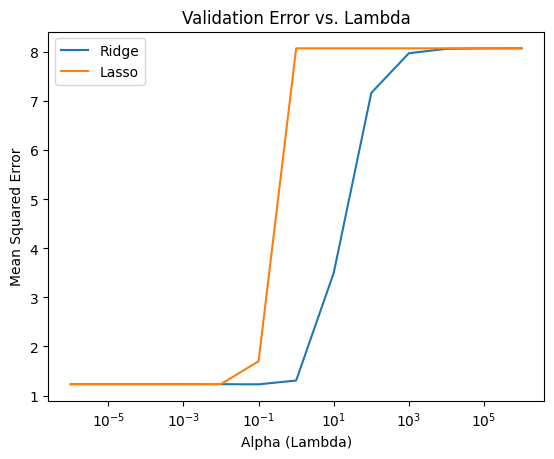

Best alpha for Ridge:  0.1
Best alpha for Lasso:  0.001


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 5)
y = X.dot(np.array([1, 2, 3, 4, 5])) + np.random.randn(100)

# Split the data into a training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of lambda (alpha) values to test
alphas = np.logspace(-6, 6, 13)

# Perform Ridge regression with cross-validation
ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_scores.append(-np.mean(scores))

# Perform Lasso regression with cross-validation
lasso_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_scores.append(-np.mean(scores))

# Find the best lambda for Ridge and Lasso
best_alpha_ridge = alphas[np.argmin(ridge_scores)]
best_alpha_lasso = alphas[np.argmin(lasso_scores)]

# Plot the validation error for Ridge and Lasso
plt.figure()
plt.semilogx(alphas, ridge_scores, label='Ridge')
plt.semilogx(alphas, lasso_scores, label='Lasso')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('Mean Squared Error')
plt.title('Validation Error vs. Lambda')
plt.legend()
plt.show()

print("Best alpha for Ridge: ", best_alpha_ridge)
print("Best alpha for Lasso: ", best_alpha_lasso)
